In [7]:
import config, time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

In [35]:
lat = -6.809936
lon = 111.996125
APIkey = "e7bad2b01391a8007cd0d8209f639653"
part = "current"
data = requests.get(f"https://api.openweathermap.org/data/2.5/onecall?lat={lat}&lon={lon}&exclude={part}&appid={APIkey}")
data

<Response [200]>

In [36]:
data.json().keys()

dict_keys(['lat', 'lon', 'timezone', 'timezone_offset', 'minutely', 'hourly', 'daily'])

In [38]:
hourly = data.json()['hourly']
df = pd.DataFrame(hourly)
df['dt'] = pd.to_datetime((df['dt'] + (7*60*60)) * 1000000000)
df

,dt,temp,feels_like,pressure,humidity,dew_point,uvi,clouds,visibility,wind_speed,wind_deg,wind_gust,weather,pop,rain
0,2022-04-19 22:00:00,299.33,299.33,1011,85,296.61,0.00,100,6558,3.88,242,4.89,"[{'id': 501, 'main': 'Rain', 'description': 'm...",1.00,{'1h': 1.77}
1,2022-04-19 23:00:00,299.19,299.19,1011,86,296.66,0.00,100,10000,4.98,204,5.68,"[{'id': 501, 'main': 'Rain', 'description': 'm...",1.00,{'1h': 3.16}
2,2022-04-20 00:00:00,299.06,299.98,1011,87,296.73,0.00,100,10000,3.59,186,3.94,"[{'id': 501, 'main': 'Rain', 'description': 'm...",1.00,{'1h': 2.73}
3,2022-04-20 01:00:00,298.81,299.73,1010,88,296.67,0.00,100,10000,3.13,153,3.11,"[{'id': 501, 'main': 'Rain', 'description': 'm...",1.00,{'1h': 2.05}
4,2022-04-20 02:00:00,298.63,299.56,1010,89,296.68,0.00,100,10000,3.29,140,3.13,"[{'id': 500, 'main': 'Rain', 'description': 'l...",0.92,{'1h': 0.36}
5,2022-04-20 03:00:00,298.39,299.32,1009,90,296.63,0.00,100,10000,2.94,157,2.78,"[{'id': 500, 'main': 'Rain', 'description': 'l...",0.92,{'1h': 0.27}
6,2022-04-20 04:00:00,298.08,298.98,1009,90,296.26,0.00,100,10000,2.11,161,1.90,"[{'id': 500, 'main': 'Rain', 'description': 'l...",0.92,{'1h': 0.27}
7,2022-04-20 05:00:00,298.21,299.10,1009,89,296.05,0.00,100,10000,1.68,144,1.49,"[{'id': 804, 'main': 'Clouds', 'description': ...",0.72,NaN
8,2022-04-20 06:00:00,298.50,299.36,1010,87,295.97,0.07,100,10000,2.20,141,1.97,"[{'id': 804, 'main': 'Clouds', 'description': ...",0.72,NaN
9,2022-04-20 07:00:00,298.84,299.68,1010,85,295.99,0.59,100,10000,2.77,149,2.66,"[{'id': 804, 'main': 'Clouds', 'description': ...",0.80,NaN


In [61]:
Content_1d = []
for i in range(len(hourly)):
    content_1d = {}
    content = hourly[i]
    for k in content.keys():
        if type(content[k]) not in (str, int, float):
            if type(content[k]) == list:
                l = content[k][0]
                for m in l.keys():
                    content_1d[f"{k}_{m}"] = l[m]
            elif type(content[k]) == dict:
                for l in content[k].keys():
                    content_1d[f"{k}_{l}"] = content[k][l]
            else:
                print(f"type data {k} not found ({type(content[k])})")
        else:
            content_1d[k] = content[k]
    Content_1d.append(content_1d)
df = pd.DataFrame(Content_1d)
df['dt'] = pd.to_datetime((df['dt'] + (7*60*60)) * 1000000000)
df['coord_lat'] = -6.8099
df['coord_lon'] = 111.9961
df['temp'] -= 273.25
df['feels_like'] -= 273.25
df.to_csv('src/weather_information_forecast.csv', index=False)
df.head()

,dt,temp,feels_like,pressure,humidity,dew_point,uvi,clouds,visibility,wind_speed,wind_deg,wind_gust,weather_id,weather_main,weather_description,weather_icon,pop,rain_1h,coord_lat,coord_lon
0,2022-04-19 22:00:00,26.08,26.08,1011,85,296.61,0.0,100,6558,3.88,242,4.89,501,Rain,moderate rain,10n,1.00,1.77,-6.8099,111.9961
1,2022-04-19 23:00:00,25.94,25.94,1011,86,296.66,0.0,100,10000,4.98,204,5.68,501,Rain,moderate rain,10n,1.00,3.16,-6.8099,111.9961
2,2022-04-20 00:00:00,25.81,26.73,1011,87,296.73,0.0,100,10000,3.59,186,3.94,501,Rain,moderate rain,10n,1.00,2.73,-6.8099,111.9961
3,2022-04-20 01:00:00,25.56,26.48,1010,88,296.67,0.0,100,10000,3.13,153,3.11,501,Rain,moderate rain,10n,1.00,2.05,-6.8099,111.9961
4,2022-04-20 02:00:00,25.38,26.31,1010,89,296.68,0.0,100,10000,3.29,140,3.13,500,Rain,light rain,10n,0.92,0.36,-6.8099,111.9961


In [68]:
history = pd.read_excel('src/weather_information.xlsx')
future = df[history.columns]
DF = history.append(future)
DF = DF.sort_values('dt').set_index('dt')
DF

,coord_lat,coord_lon,weather_description,temp,feels_like,humidity,wind_speed,wind_deg
dt,,,,,,,,
2022-04-07 09:00:00,-6.8099,111.9961,overcast clouds,28.35,31.69,71.5,5.18,178.0
2022-04-07 10:00:00,-6.8099,111.9961,overcast clouds,28.94,32.61,69.5,4.56,173.0
2022-04-07 11:00:00,-6.8099,111.9961,overcast clouds,29.06,32.78,69.0,3.60,164.5
2022-04-07 12:00:00,-6.8099,111.9961,overcast clouds,29.12,32.77,68.2,2.76,153.8
2022-04-07 13:00:00,-6.8099,111.9961,overcast clouds,29.52,33.17,66.0,1.73,136.0
...,...,...,...,...,...,...,...,...
2022-04-21 17:00:00,-6.8099,111.9961,light rain,27.48,30.60,77.0,3.25,23.0
2022-04-21 18:00:00,-6.8099,111.9961,moderate rain,27.01,29.89,80.0,2.85,22.0
2022-04-21 19:00:00,-6.8099,111.9961,moderate rain,27.00,29.76,79.0,2.49,19.0


C:\Users\ichsa\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\ichsa\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\ichsa\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


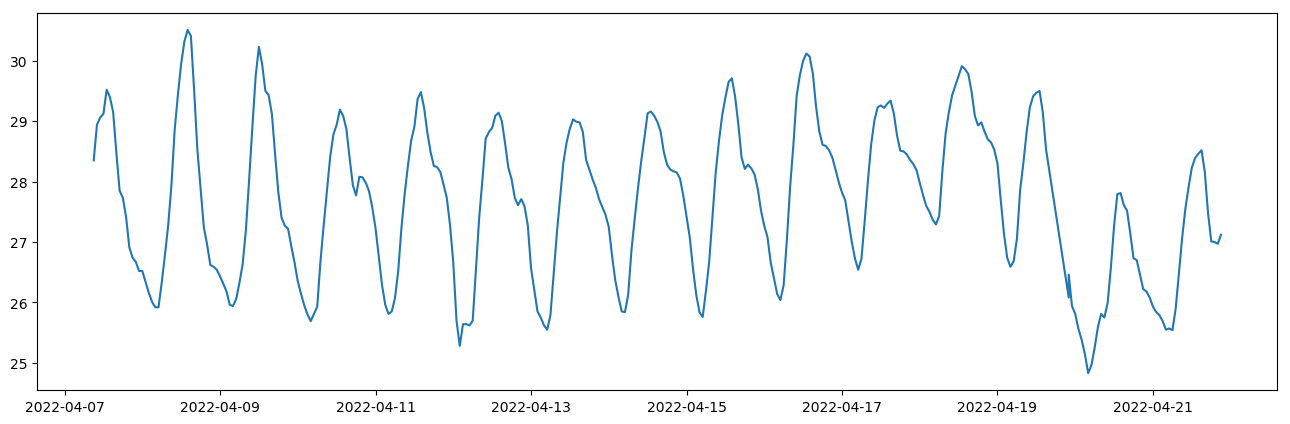

In [69]:
plt.figure(figsize=(16,5), dpi=100)
plt.plot(DF.index, DF['temp'])